# Portugal Bank Marketing

In [31]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score


# Importing the dataset

In [5]:
df = pd.read_csv("C:/Users/chandu/Downloads/Paper1/bank.csv")

In [6]:
df.head(5)

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."


In [8]:
df = pd.read_csv('C:/Users/chandu/Downloads/Paper1/bank.csv',sep = ';')

# Data featuring

In [9]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Exploratory Data Analysis

In [12]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [13]:
y1 = df['y']
#df.drop('y',axis = 1,inplace = True)

In [14]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [15]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

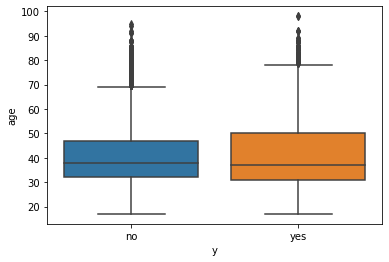

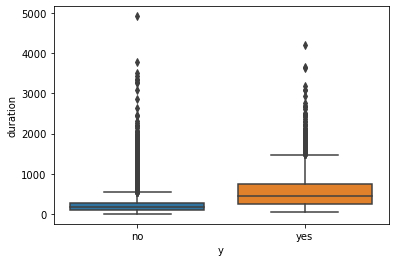

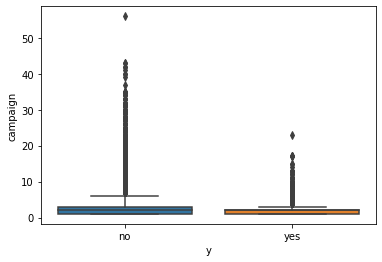

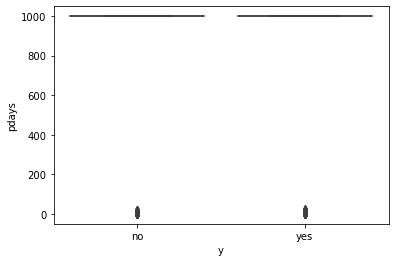

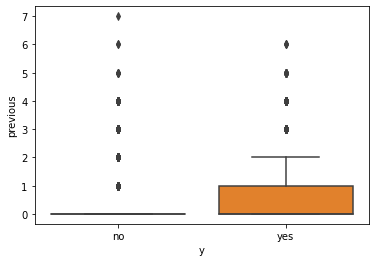

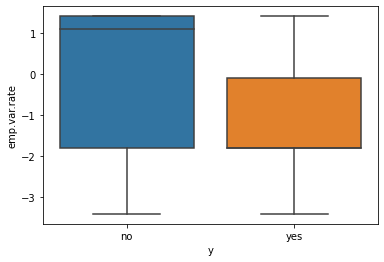

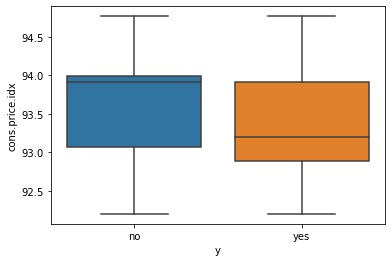

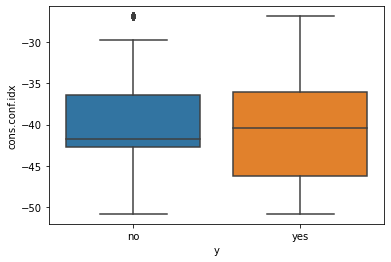

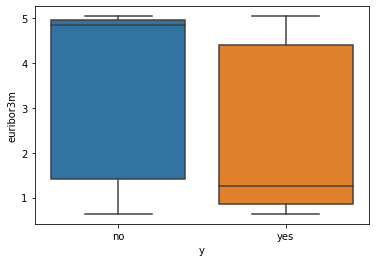

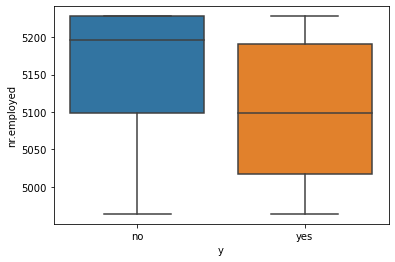

In [16]:
num_var = ["age","duration","campaign", "pdays", "previous","emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

for i in num_var:
  sns.boxplot(x = y1,y = i,data = df)
  plt.show();

In [17]:
cat_var=[i for i in df.columns if i not in num_var]

In [18]:
y1 = y1.values

NameError: name 'pyplot' is not defined

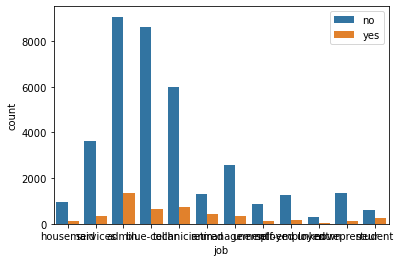

In [19]:

for i in cat_var:
    sns.countplot(x=i, hue=y1, data=df)
    pyplot.show()

In [20]:
df1 = pd.get_dummies(df)

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 65 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  job_admin.                     41188 non-null  uint8  
 11  job_blue-collar                41188 non-null  uint8  
 12  job_entrepreneur               41188 non-null 

In [22]:
df1.loc[(df1['campaign'] >15) & (df1['y_yes']==1)]

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
3219,39,651,23,999,0,1.1,93.994,-36.4,4.860,5191.0,...,0,0,1,0,0,0,1,0,0,1
10162,44,541,17,999,0,1.4,94.465,-41.8,4.958,5228.1,...,0,0,1,0,0,0,1,0,0,1
17284,59,1448,17,999,0,1.4,93.918,-42.7,4.962,5228.1,...,1,0,0,0,0,0,1,0,0,1
17655,50,1076,17,999,0,1.4,93.918,-42.7,4.962,5228.1,...,0,1,0,0,0,0,1,0,0,1
29980,31,207,17,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,0,1,0,0,1,0,0,1


In [33]:
df1 = pd.get_dummies(df)

In [34]:
y_yes1 = df1['y_yes']
y_no1 = df1['y_no']

df1.drop('y_yes',axis = 1,inplace = True)
df1.drop('y_no',axis = 1,inplace = True)

# Model Building

# RandomForest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=350,
                                random_state=0)
forest.fit(df1,y1)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [36]:
# Print the feature ranking on the basis of RandomForestClassifier

print("Feature ranking:")
for f in range(df1.shape[1]):
    print("%d. %s: %f " % (f + 1, df1.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. duration: 0.282091 
2. euribor3m: 0.094536 
3. age: 0.079953 
4. nr.employed: 0.049350 
5. campaign: 0.039866 
6. pdays: 0.030400 
7. cons.conf.idx: 0.026077 
8. cons.price.idx: 0.023676 
9. emp.var.rate: 0.019739 
10. poutcome_success: 0.019149 
11. housing_no: 0.013315 
12. housing_yes: 0.013118 
13. job_admin.: 0.012119 
14. education_university.degree: 0.011966 
15. previous: 0.011869 
16. marital_married: 0.011642 
17. day_of_week_mon: 0.010883 
18. education_high.school: 0.010787 
19. day_of_week_thu: 0.010758 
20. marital_single: 0.010609 
21. day_of_week_wed: 0.010422 
22. day_of_week_tue: 0.010376 
23. day_of_week_fri: 0.009896 
24. job_technician: 0.009840 
25. loan_no: 0.009253 
26. loan_yes: 0.008882 
27. education_professional.course: 0.008338 
28. job_blue-collar: 0.007990 
29. poutcome_nonexistent: 0.007754 
30. education_basic.9y: 0.007560 
31. poutcome_failure: 0.007215 
32. marital_divorced: 0.007115 
33. contact_cellular: 0.006686 
34. contact_tel

# KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df1, y1, test_size=0.2, random_state=1, stratify=y1)

In [ ]:
from sklearn.metrics import accuracy_score

for i in range(10,300,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    print(accuracy_score(knn.predict(X_test),y_test))

0.9098082058752124
0.9134498664724447
0.911750424860403
0.9141781985918912
0.9136926438455936


In [ ]:
##optimization
t = pd.DataFrame()
t['y_yes'] = y_yes1
t['y_no'] = y_no1
t.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(dummy)
scaled_data=scaler.transform(dummy)
rocket= pd.DataFrame(scaled_data)

# Conclusion

From the above observations,it can be concluded that KNN classifier has accuracy of approximately 91.5%.